In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
from datetime import datetime
import time
#from pylab import *
import numpy as np
import datetime
import csv

In [2]:
df = pd.read_csv('Dataset/20200118/310/summary.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime (UTC)        1404 non-null   object 
 1   Timezone (minutes)    1404 non-null   int64  
 2   Unix Timestamp (UTC)  1404 non-null   int64  
 3   Acc magnitude avg     1404 non-null   float64
 4   Eda avg               1404 non-null   float64
 5   Temp avg              1404 non-null   float64
 6   Movement intensity    1404 non-null   int64  
 7   Steps count           1404 non-null   int64  
 8   Rest                  1404 non-null   int64  
 9   On Wrist              1404 non-null   bool   
dtypes: bool(1), float64(3), int64(5), object(1)
memory usage: 100.2+ KB


In [4]:
df["Datetime (UTC)"].head(5)

0    2020-01-17T23:48:00Z
1    2020-01-17T23:49:00Z
2    2020-01-17T23:50:00Z
3    2020-01-17T23:51:00Z
4    2020-01-17T23:52:00Z
Name: Datetime (UTC), dtype: object

In [5]:
# time = df["Datetime (UTC)"]
# time.tzinfo
df.dtypes

Datetime (UTC)           object
Timezone (minutes)        int64
Unix Timestamp (UTC)      int64
Acc magnitude avg       float64
Eda avg                 float64
Temp avg                float64
Movement intensity        int64
Steps count               int64
Rest                      int64
On Wrist                   bool
dtype: object

In [6]:
type(df['Datetime (UTC)'])

pandas.core.series.Series

In [7]:
#df['Date'] = pd.to_datetime(df['Datetime (UTC)'], format='%Y-%m-%dT%XZ')
df['Date'] = pd.to_datetime(df['Datetime (UTC)'], format='%Y-%m-%dT%Xz')

In [8]:
df.head()

,Datetime (UTC),Timezone (minutes),Unix Timestamp (UTC),Acc magnitude avg,Eda avg,Temp avg,Movement intensity,Steps count,Rest,On Wrist,Date
0,2020-01-17T23:48:00Z,-300,1579304880000,1.063262,0.541921,30.155257,0,0,0,True,2020-01-17 23:48:00
1,2020-01-17T23:49:00Z,-300,1579304940000,1.005967,0.539037,29.979900,0,0,0,True,2020-01-17 23:49:00
2,2020-01-17T23:50:00Z,-300,1579305000000,1.045804,0.535254,29.713417,0,0,0,True,2020-01-17 23:50:00
3,2020-01-17T23:51:00Z,-300,1579305060000,1.017389,0.532977,29.416833,0,0,0,True,2020-01-17 23:51:00
4,2020-01-17T23:52:00Z,-300,1579305120000,1.030430,0.532688,29.275200,0,0,0,True,2020-01-17 23:52:00


In [9]:
df['Date'].dt.time
df['Time'] = df['Date'].dt.time
df['Month'] = df['Date'].dt.month

In [10]:
df['Datetime (UTC)'].head()

0    2020-01-17T23:48:00Z
1    2020-01-17T23:49:00Z
2    2020-01-17T23:50:00Z
3    2020-01-17T23:51:00Z
4    2020-01-17T23:52:00Z
Name: Datetime (UTC), dtype: object

You selected: UTC


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\sydne\AppData\Local\Temp\ipykernel_18424\3961554544.py", line 88, in plot
    toolbar.pack(anchor="w", fill=tk.X)
  File "C:\Users\sydne\anaconda3\lib\tkinter\__init__.py", line 2425, in pack_configure
    self.tk.call(
_tkinter.TclError: cannot use geometry manager pack inside .!frame.!graph.!labelframe which already has slaves managed by grid


You selected: Local Time


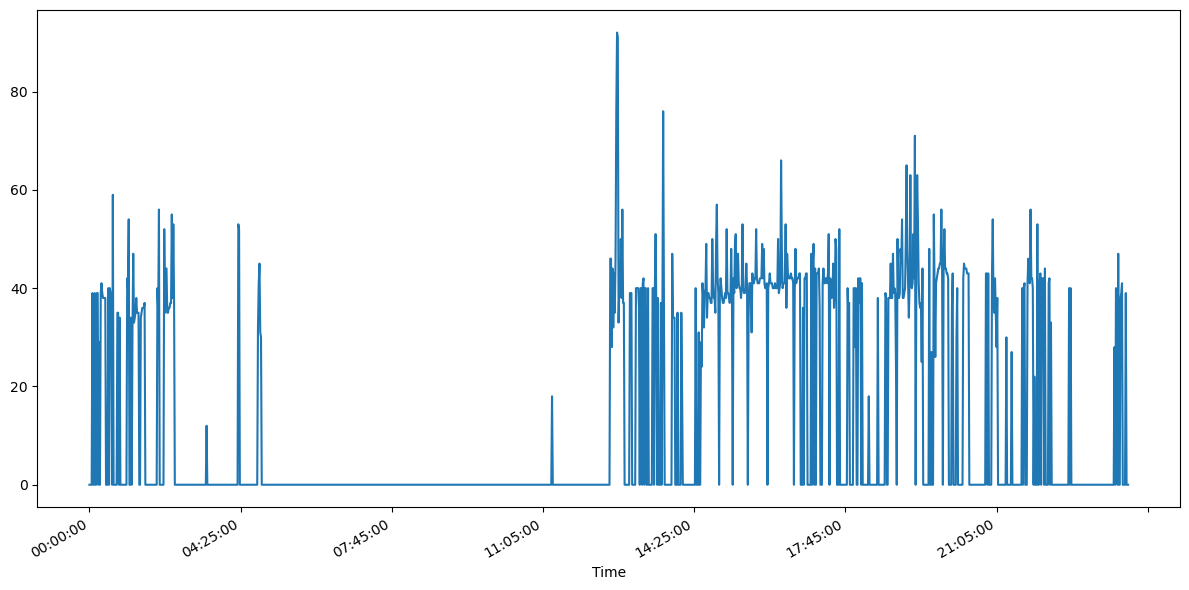

In [13]:
df['Time'] = df['Time'].astype(str)
x = df['Date']
y = df['Eda avg']

def select_file():
    filetypes = (
        ('text files', '*.txt'),
        ('All files', '*.*')
    )
    filename = fd.askopenfilename(
        title='Open a file',
        initialdir='/',
        filetypes=filetypes)
    # showinfo(
    #     title='Selected File',
    #     message=filename
    # )


class Graphy(tk.Tk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.title("Graphy")
        self.frames = dict()

        container = ttk.Frame(self)
        container.grid(padx=60, pady=30, sticky="EW")

        for FrameClass in (Graph, Chart):
            frame = FrameClass(container, self)
            self.frames[FrameClass] = frame
            frame.grid(row=0, column=0, sticky="NSEW")

        self.show_frame(Graph)

    def show_frame(self, container):
        frame = self.frames[container]
        frame.tkraise()


class Graph(ttk.Frame):
    def __init__(self, container, controller):
        super().__init__(container)

        frame = LabelFrame(self, padx=50, pady=50)
        frame.grid(padx=10, pady=10)

        def plot():
            #pylab.rcParams['xtick.major.pad']= '25'
            
            fig = Figure(figsize = (12, 6), dpi = 200)

            #plt.rc_context({'xtick.major.pad':10})
            
            # adding the subplot
            fig,axes = plt.subplots(1,1, figsize=(12, 6)) #add_subplots(111)
            axes.clear()
            
            #axes.tick_params(axis='x', which='major', pad=50)
            
            #axes.plot(x,y)
            
            fig.autofmt_xdate()
            #axes.plot(x,y)
            df.groupby('Time').max()['Steps count'].plot()
            plt.tight_layout()
            
            # plotting the graph
            plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')
            #axes.xaxis.set_tick_params(padx=100)
            fig.tight_layout()

            #fig = sns.lineplot(df, x=X, y=Y)


            # creating the Tkinter canvas
            # containing the Matplotlib figure

            canvas = FigureCanvasTkAgg(fig, frame)  
            canvas.draw()
            canvas.get_tk_widget().grid(row=1, sticky="EW")

            # !!!Not Working!!!
            # creating the Matplotlib toolbar
            toolbar = NavigationToolbar2Tk(canvas, frame, pack_toolbar=False)
            toolbar.update()
            toolbar.pack(anchor="w", fill=tk.X)
            # canvas.get_tk_widget().pack()

        plot_button = Button(frame, text="Graph", command = plot, height = 2, width = 10)
        plot_button.grid(row=0, column=0)
        switch_page_button = Button(
            self,
            text="Switch to Chart",
            command=lambda: controller.show_frame(Chart)
        )
        switch_page_button.grid(column=0, row=1, columnspan=2, sticky="EW")
        
        #COMBO BOX
        time_values = ('UTC', 'Local Time')
        time_string = tk.StringVar(value=time_values[0])
        combo = ttk.Combobox(frame, textvariable=time_string)
        combo['values'] = time_values
        combo.grid(row=0, column=1)
        
        def option_selected(event):
            selected_option = combo.get()
            print("You selected:", selected_option)
            if selected_option == 'UTC':
                x = df['Time']
        
        combo.bind("<<ComboboxSelected>>", option_selected)
        


class Chart(ttk.Frame):
    def __init__(self, container, controller):
        super().__init__(container)

        frame = LabelFrame(self, padx=50, pady=50)
        frame.grid(padx=10, pady=10)

        b = Button(frame, text="Chart")
        b.grid(row=0, column=0)
        
         #Statistical Analysis
        analyze = Button(frame, text="Analyze")
        analyze.grid(row=0, column=1)
        
        def analyze_data(event):
            #analyze_text = df.describe()
            canvas = Canvas(width=1000, height=750)
            canvas.create_text(550, 350, text=df.describe(), fill="black", font=('Helvetica 12 bold'))
            canvas.grid(row=0, column=0)
            
        analyze.bind('<Button>', analyze_data)
        # End of Statistical Analysis
        
        switch_page_button = Button(
            self,
            text="Switch to Graph",
            command=lambda: controller.show_frame(Graph)
        )
        switch_page_button.grid(column=0, row=2, columnspan=2, sticky="EW")
        
        #Statistical Analysis
#         analyze = Button(frame, text="Analyze")
#         analyze.grid(row=0, column=1)
        
#         def analyze_data(event):
#             #analyze_text = df.describe()
#             canvas = Canvas(width=1000, height=750)
#             canvas.create_text(550, 350, text=df.describe(), fill="black", font=('Helvetica 12 bold'))
#             canvas.grid(row=0, column=0)
            
#         analyze.bind('<Button>', analyze_data)
        
        


root = Graphy()
root.state('zoomed') #will take up the whole screen.
root.mainloop()

In [12]:
df['Time'].max()

'23:59:00'

AttributeError: 'Series' object has no attribute 'hour'